# Customer Segmentation / Clustering

In [46]:
# Importing required libraries
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load datasets
customers = pd.read_csv("C:\\Users\\Admin\\Downloads\\Customers.csv")
transactions = pd.read_csv("C:\\Users\\Admin\\Downloads\\Transactions.csv")

In [48]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [49]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [50]:
# Merge datasets on CustomerID
data = pd.merge(customers, transactions, on="CustomerID", how="inner")

In [51]:
data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


In [52]:
# Step 1: Data Preprocessing
# Convert date columns to datetime format
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])


In [53]:
# Calculate additional features
today = datetime(2025, 1, 28)  # Assuming the current date
data['DaysSinceSignup'] = (today - data['SignupDate']).dt.days

In [56]:
# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'TransactionID': 'count',  # Number of transactions
    'DaysSinceSignup': 'first',  # Days since signup
    'Region': 'first'  # Region (categorical)
}).reset_index()

In [62]:
customer_data

,CustomerID,TotalValue,TransactionID,DaysSinceSignup,Region
0,C0001,3354.52,5,933,South America
1,C0002,1862.74,4,1080,Asia
2,C0003,2725.38,4,327,South America
3,C0004,5354.88,8,842,South America
4,C0005,2034.24,3,897,Asia
...,...,...,...,...,...
194,C0196,4982.88,4,966,Europe
195,C0197,1928.65,3,679,Europe
196,C0198,931.83,2,1066,Europe
197,C0199,1979.28,4,787,Europe


In [67]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            199 non-null    object 
 1   TotalSpend            199 non-null    float64
 2   TransactionCount      199 non-null    int64  
 3   DaysSinceSignup       199 non-null    int64  
 4   Region_Europe         199 non-null    uint8  
 5   Region_North America  199 non-null    uint8  
 6   Region_South America  199 non-null    uint8  
dtypes: float64(1), int64(2), object(1), uint8(3)
memory usage: 6.9+ KB


In [63]:
# Rename columns
customer_data.columns = ['CustomerID', 'TotalSpend', 'TransactionCount', 'DaysSinceSignup', 'Region']


In [64]:
# Encode the Region column (One-Hot Encoding)
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)


In [69]:
# Step 2: Feature Scaling
scaler = StandardScaler()
features = ['TotalSpend', 'TransactionCount',  'DaysSinceSignup']
customer_data[features] = scaler.fit_transform(customer_data[features])

In [70]:
# Step 3: Clustering
# Apply K-Means with different values of k (2 to 10)
k_values = range(2, 11)
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_data[features])
    db_index = davies_bouldin_score(customer_data[features], labels)
    db_scores.append(db_index)

In [71]:

# Identify the optimal number of clusters (lowest DB Index)
optimal_k = k_values[db_scores.index(min(db_scores))]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 4


In [72]:
# Apply K-Means with the optimal number of clusters
final_model = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = final_model.fit_predict(customer_data[features])


In [73]:
# Step 4: Evaluation Metrics
print(f"DB Index for {optimal_k} clusters: {min(db_scores)}")


DB Index for 4 clusters: 0.8821991487279204


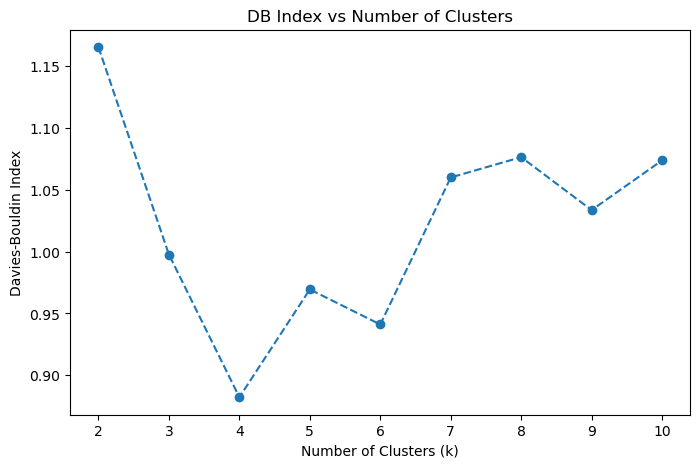

In [74]:
# Step 5: Visualization
# Plot DB Index values for different k
plt.figure(figsize=(8, 5))
plt.plot(k_values, db_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index vs Number of Clusters')
plt.show()

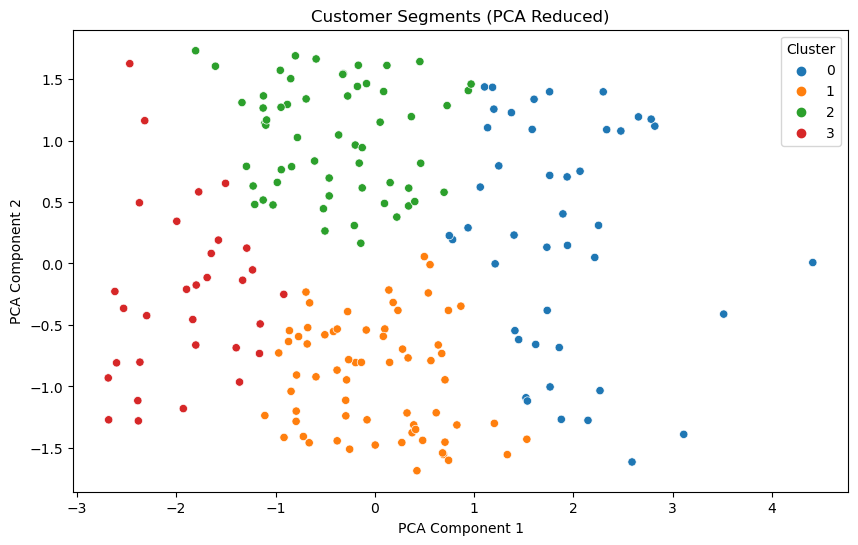

In [75]:
# Visualize clusters (using the first two PCA components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(customer_data[features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_data['Cluster'], palette='tab10')
plt.title('Customer Segments (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [76]:
# Step 6: Save Results
customer_data.to_csv("Customer_Segments.csv", index=False)
print("Segmented data saved to 'Customer_Segments.csv'")


Segmented data saved to 'Customer_Segments.csv'
